In [ ]:
#generate a sample. Calculate theta and t_2 for this sample. Repeat this R = 10; 000 times. 


In [1]:
import numpy as np 
import statsmodels.api as sm 
import random
import matplotlib.pyplot  as plt
import pandas as pd


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
def simulate_theta(n,R):
  #1
#def function that calculates theta and t_2 


  def one_iteration(n):
    #calculate x, e
    mean = [0, 0]
    cov = [[1, 0], [0, 1]]
    x = np.array(np.random.multivariate_normal(mean, cov, n))
    e = np.array(np.random.normal(0,np.sqrt(3),n))
    b = np.array([1,0.5])
    y=np.matmul(x,b)+e

    theta = b[0]/b[1]
    # calculate theta
    beta_hat = sm.OLS(y,x).fit().params
    theta_hat = beta_hat[0]/beta_hat[1]

    # calculate t_2
    Q_xx = np.matmul(x.T,x)/n

    Q_xx = Q_xx.sum(axis=1).sum(axis = 0)

    e_hat = y-np.matmul(x,beta_hat)
    xe_hat=np.matmul(x.T,np.diag(e_hat))

    V_xe = np.matmul(xe_hat,xe_hat.T)/n
    V_xe = V_xe.sum(axis=1).sum(axis = 0)
    bb = (1/beta_hat[1] - beta_hat[0]/(beta_hat[1]**2))**2


    t_theta = np.sqrt(n)*(theta_hat - theta)/np.sqrt(bb*(Q_xx**2)*V_xe)
    return(theta_hat, t_theta)



  #Repeat R=10000 times

 
  theta_total = [1]*R
  all_t = [1]*R

  for i in range(R):
    theta_total[i], all_t[i] = one_iteration(n)

  return(theta_total, all_t)

In [16]:
theta_total, all_t = simulate_theta(4,10000)

-0.3413217740044767 56.848277423703045


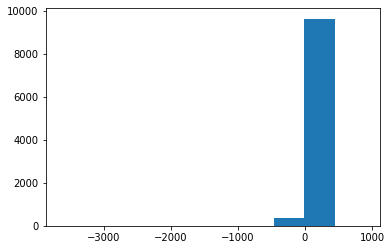

In [17]:
#2
#plot 
plt.hist(theta_total)
print(np.mean(theta_total), np.std(theta_total))

-287.1116846531011 9091.195531198387


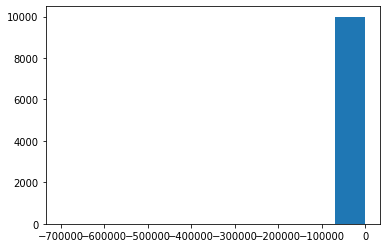

In [18]:
plt.hist(all_t)
print(np.mean(all_t), np.std(all_t))

In general both distributions have very unusual variance.The asymptotic distribution does not match the simulated exact distribution well. Possible reasons for this are small size and nonlinear association with theta and t_2. 

In [19]:
#3
#Repeat with n=20
theta_total20, all_t20 = simulate_theta(20,10000)

-38.9732707891582 4063.834559469763


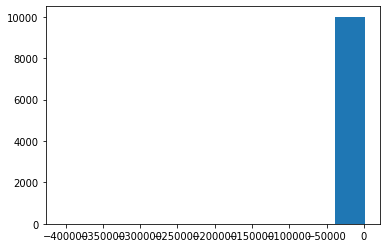

In [21]:
plt.hist(theta_total20)
print(np.mean(theta_total20), np.std(theta_total20))

-20.929767954046646 1060.8304382126673


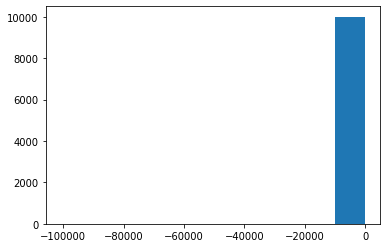

In [22]:
plt.hist(all_t20)
print(np.mean(all_t20), np.std(all_t20))

(array([ 153.,  252.,  384.,  738., 1542., 2561., 1471.,  737.,  368.,
         240.]),
 array([-4.99052896e+00, -3.99183540e+00, -2.99314185e+00, -1.99444829e+00,
        -9.95754728e-01,  2.93883018e-03,  1.00163239e+00,  2.00032595e+00,
         2.99901951e+00,  3.99771306e+00,  4.99640662e+00]),
 <a list of 10 Patch objects>)

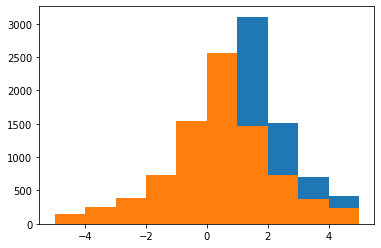

In [23]:
#Let us compare
d2 = np.array(theta_total20)
d2 = d2[d2>-5]
d2 = d2[d2<5]
plt.hist(d2)

d1 = np.array(theta_total)
d1 = d1[d1>-5]
d1 = d1[d1<5]
plt.hist(d1)

(array([ 299.,  419.,  599.,  978., 2278., 1881.,  197.,   96.,   45.,
          30.]),
 array([-4.99543919, -4.00156346, -3.00768773, -2.013812  , -1.01993627,
        -0.02606054,  0.96781519,  1.96169093,  2.95556666,  3.94944239,
         4.94331812]),
 <a list of 10 Patch objects>)

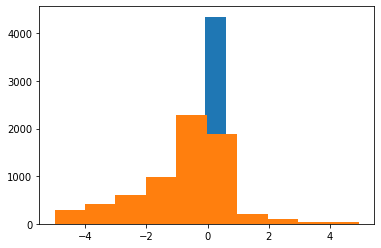

In [24]:
#Compare t_2
dt2 = np.array(all_t20)
dt2 = dt2[dt2>-5]
dt2 = dt2[dt2<5]
plt.hist(dt2)

# Let's zoom in the t estimate
dt1 = np.array(all_t)
dt1 = dt1[dt1>-5]
dt1 = dt1[dt1<5]
plt.hist(dt1)

It can be seen that increasing the size of the sample increases the quality. However, it is obvious that n=20 is still not enough and n should be increased further. 

4.
*The quality of asymptotic approximation depends only on the degree of nonlinearity of the transformation used in the Delta method.*\
It is not true, not only. It was shown above that the quality depends on the sample size as well. In addition, the asymptotic approximation is poorer for t_2 than that for theta. Increasing sample size in each iteration helps to increase the quality of approximation. 